# Understanding the problem statement and the business case:

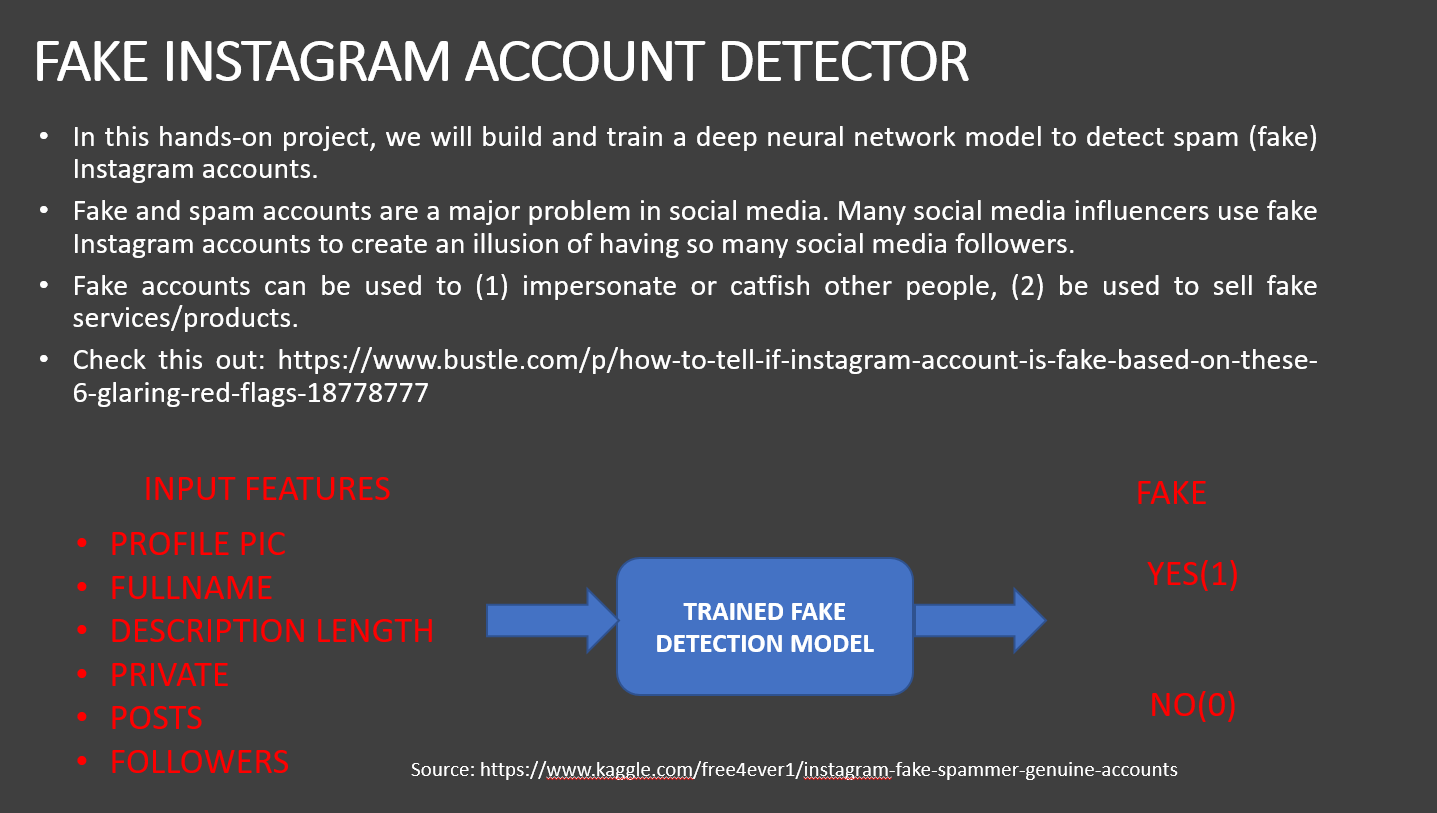

# Import datasets and libraries

In [1]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 51.3 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 82.5 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7540 sha256=46889bb4b8c689f63a69cc30f3c822be62631941031d33328bc44f1f4190b0b6
  Stored in directory: /home/nbuser/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling ten

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [4]:
# Load the training dataset
df_insta_train = pd.read_csv('insta_train.csv')

In [5]:
df_insta_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
# Load the testing data
df_insta_test = pd.read_csv('insta_test.csv')
df_insta_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


# Exploratory Data Analysis

In [7]:
# Getting dataframe info
df_insta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
# Get the statistical summary of the dataframe
df_insta_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [9]:
# Checking if null values exist
df_insta_train.isna().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [10]:
# Get the number of unique values in the "profile pic" feature
df_insta_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [11]:
# Get the number of unique values in "fake" (Target column)
df_insta_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

# Perform data visualisation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fake', ylabel='count'>

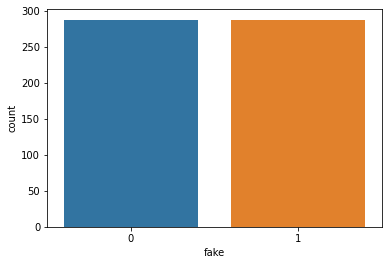

In [12]:
# Visualize the data
sns.countplot(df_insta_train['fake'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='private', ylabel='count'>

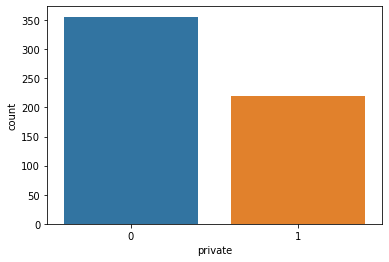

In [13]:
# Visualize the private column data
sns.countplot(df_insta_train['private'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='profile pic', ylabel='count'>

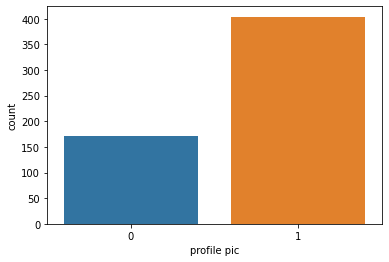

In [14]:
# Visualize the "profile pic" column data
sns.countplot(df_insta_train['profile pic'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nums/length username', ylabel='Density'>

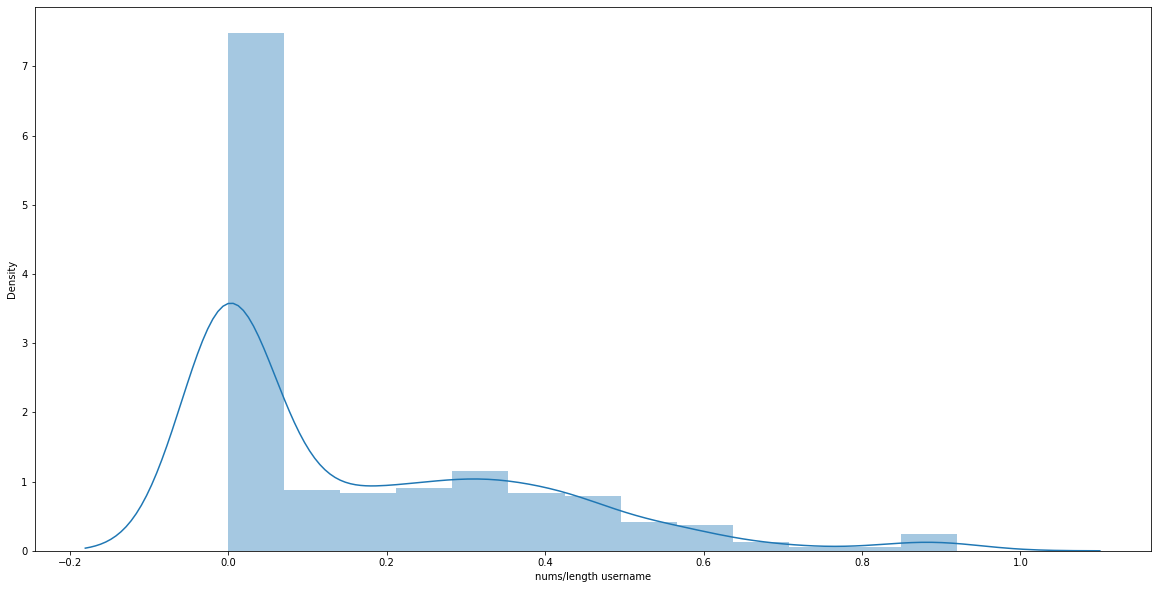

In [15]:
# Visualize the data
plt.figure(figsize = (20, 10))

sns.distplot(df_insta_train['nums/length username'])

<Figure size 1440x1440 with 0 Axes>

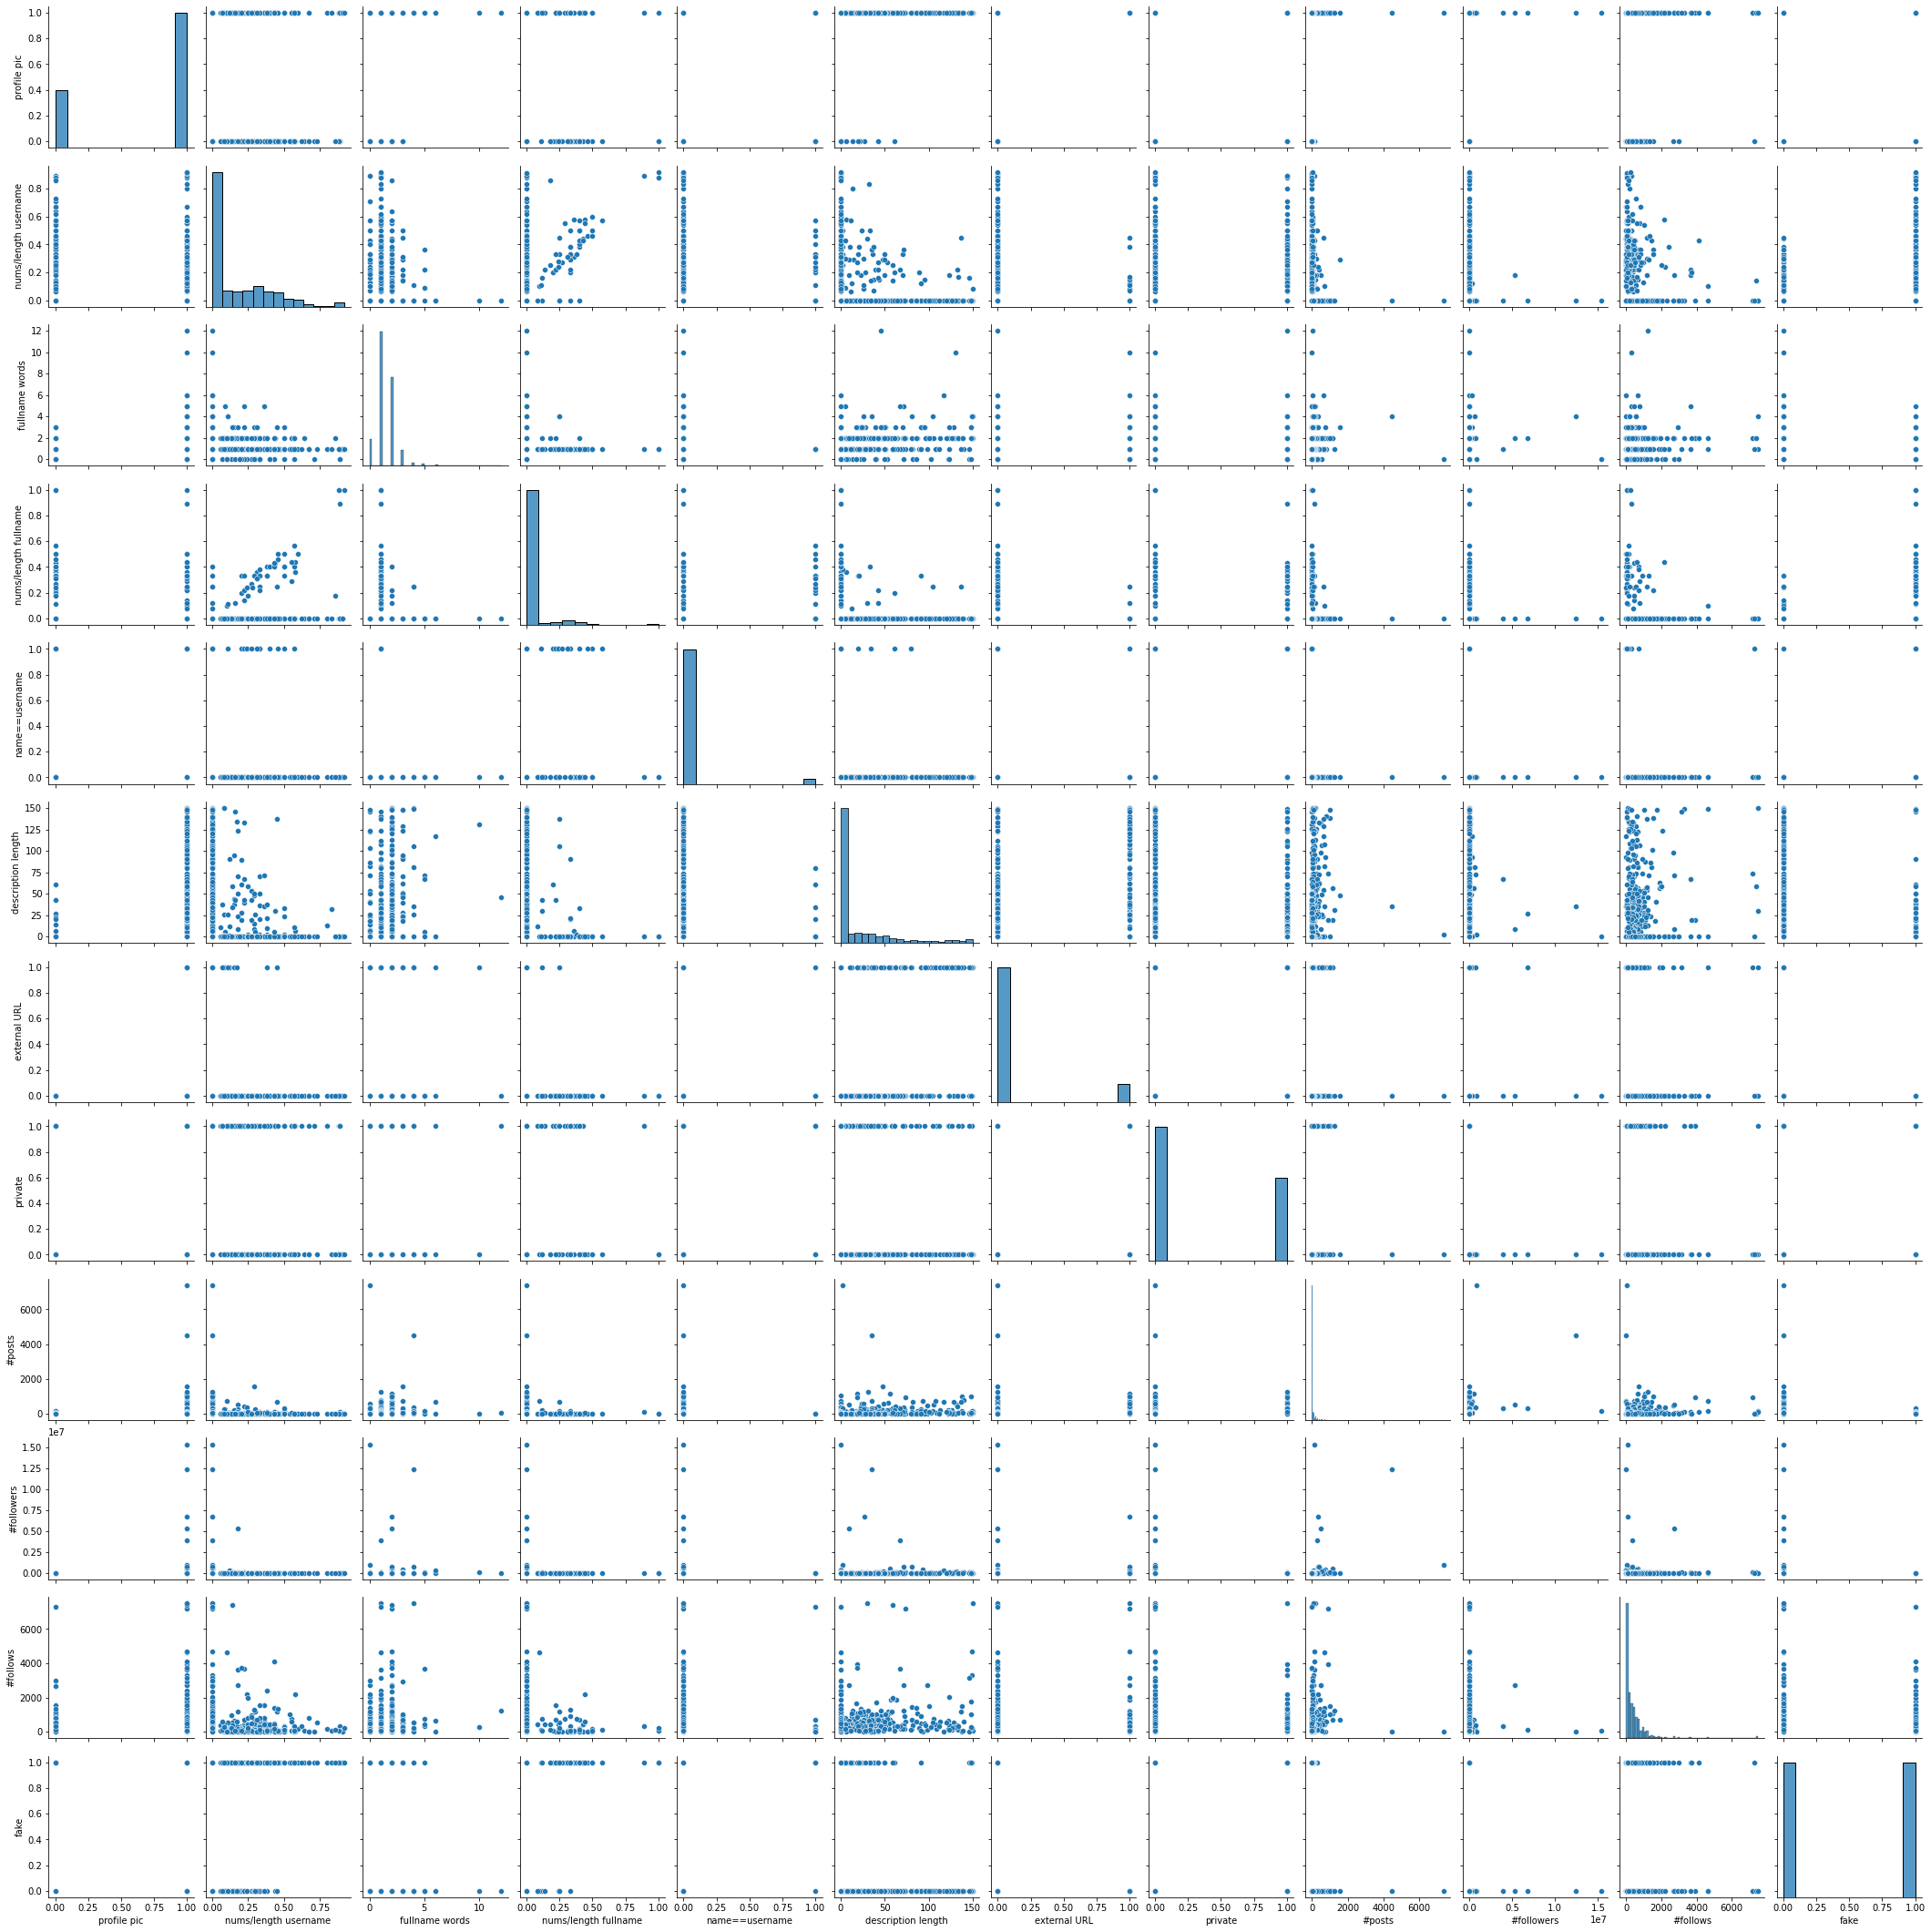

In [16]:
# Plot pairplot
plt.figure(figsize = (20, 20))

sns.pairplot(df_insta_train)

<AxesSubplot:>

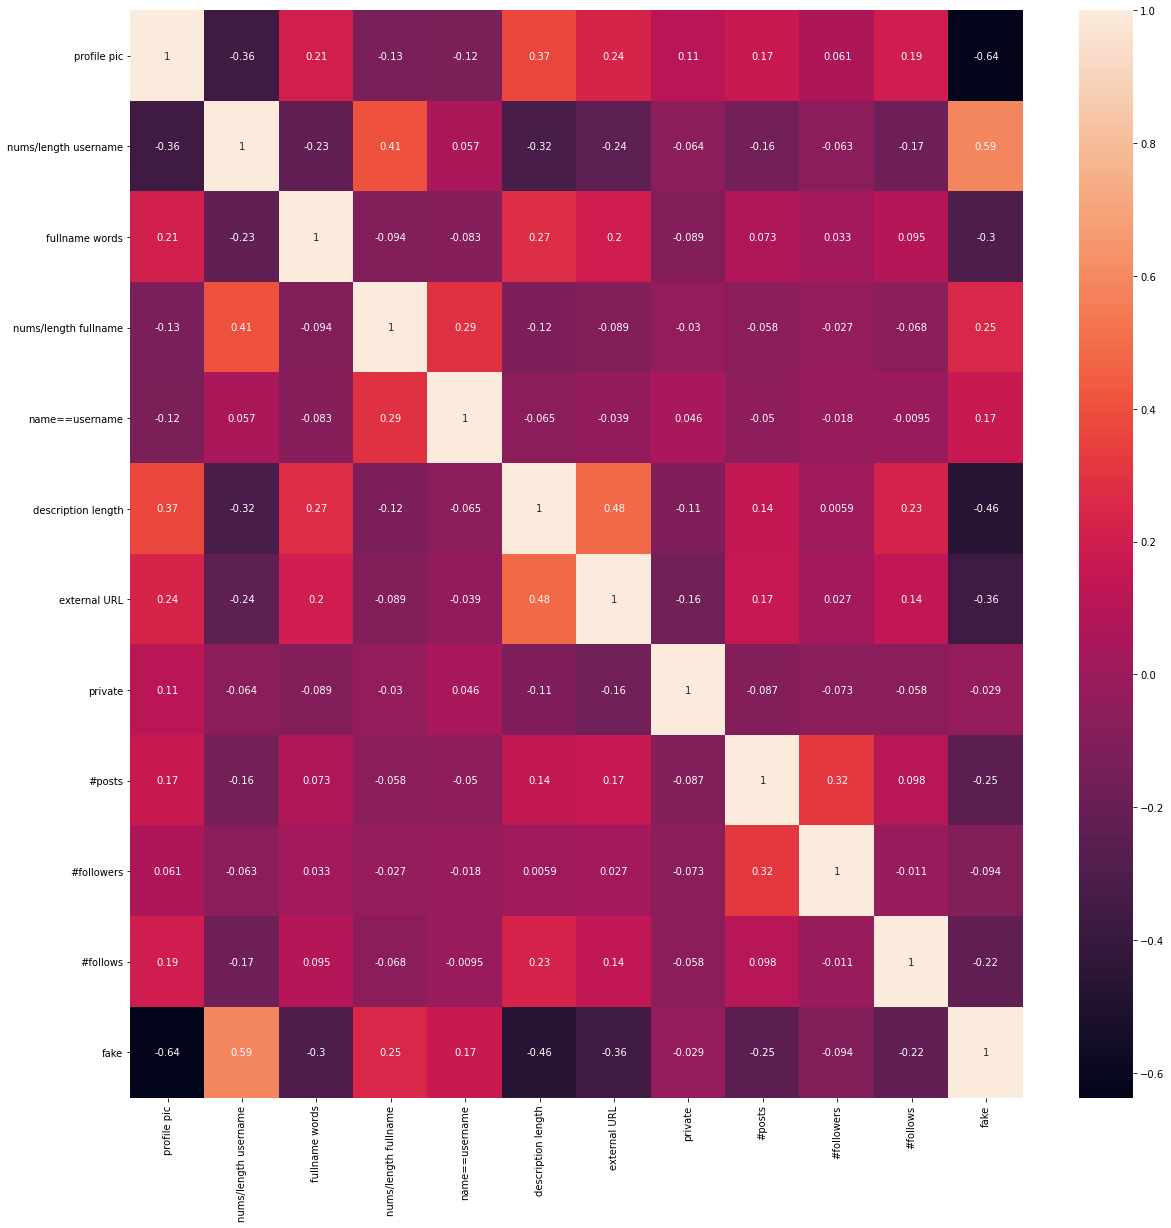

In [17]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = df_insta_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fake', ylabel='count'>

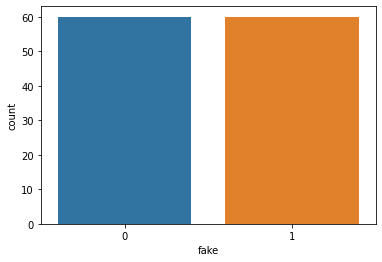

In [18]:
sns.countplot(df_insta_test['fake'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='profile pic', ylabel='count'>

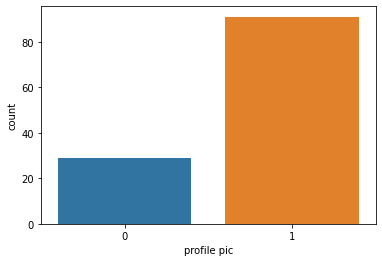

In [19]:
sns.countplot(df_insta_test['profile pic'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='private', ylabel='count'>

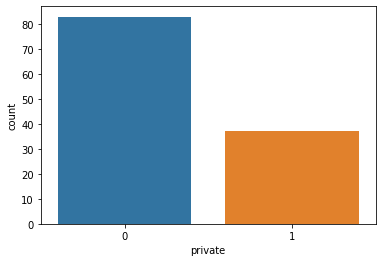

In [20]:
sns.countplot(df_insta_test['private'])

# Prepare data to feed the model

In [21]:
# Training and testing dataset (inputs)
X_train = df_insta_train.drop(columns = ['fake'])
X_test = df_insta_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [22]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [23]:
# Training and testing dataset (Outputs)
y_train = df_insta_train['fake']
y_test = df_insta_test['fake']

In [24]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [25]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [26]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [27]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [28]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

# Build and train a simple deep learning model.

In [30]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50, input_dim = 11, activation = 'relu')) #We use input_dim as 11 as there are 11 parameters 
# in our training and test data

model.add(Dense(150, activation = 'relu')) # we don't have to specify the activation function
model.add(Dense(150, activation = 'relu')) 
# model.add(Dense(25, activation = 'relu')) 
model.add(Dense(2, activation = 'softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 31,202
Trainable params: 31,202
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/20
518/518 [==============================] - 1s 1ms/sample - loss: 0.4623 - accuracy: 0.8649 - val_loss: 0.2839 - val_accuracy: 0.8793
Epoch 2/20
518/518 [==============================] - 0s 73us/sample - loss: 0.2699 - accuracy: 0.9131 - val_loss: 0.1914 - val_accuracy: 0.8966
Epoch 3/20
518/518 [==============================] - 0s 74us/sample - loss: 0.2335 - accuracy: 0.9151 - val_loss: 0.1619 - val_accuracy: 0.8966
Epoch 4/20
518/518 [==============================] - 0s 75us/sample - loss: 0.2136 - accuracy: 0.9170 - val_loss: 0.1690 - val_accuracy: 0.8966
Epoch 5/20
518/518 [==============================] - 0s 79us/sample - loss: 0.2026 - accuracy: 0.9170 - val_loss: 0.1295 - val_accuracy: 0.9138
Epoch 6/20
518/518 [==============================] - 0s 81us/sample - loss: 0.1927 - accuracy: 0.9266 - val_loss: 0.1957 - val_accuracy: 0.8966
Epoch 7/20
518/518 [==============================] - 0s 76us/sample - loss: 0.1889 - 

In [77]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(50, input_dim = 11, activation = 'relu')) #We use input_dim as 11 as there are 11 parameters 
# in our training and test data

model.add(Dense(150, activation = 'relu')) # we don't have to specify the activation function
model.add(Dropout(0.3))

# model.add(Dense(150, activation = 'relu')) 
model.add(Dense(25, activation = 'relu')) 

# we add a dropout layer so that we can ensure that the model predicts and not just memorises and thereby 
# remove overfitting. We enable it to generalise.
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_18 (Dense)             (None, 150)               7650      
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 25)                3775      
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 52        
Total params: 12,077
Trainable params: 12,077
Non-trainable params: 0
__________________________________________________

In [78]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [79]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/20
518/518 [==============================] - 1s 1ms/sample - loss: 0.6193 - accuracy: 0.7066 - val_loss: 0.6123 - val_accuracy: 0.7241
Epoch 2/20
518/518 [==============================] - 0s 71us/sample - loss: 0.3975 - accuracy: 0.8745 - val_loss: 0.3616 - val_accuracy: 0.8448
Epoch 3/20
518/518 [==============================] - 0s 77us/sample - loss: 0.2903 - accuracy: 0.8996 - val_loss: 0.2573 - val_accuracy: 0.8793
Epoch 4/20
518/518 [==============================] - 0s 73us/sample - loss: 0.2836 - accuracy: 0.8996 - val_loss: 0.2267 - val_accuracy: 0.8793
Epoch 5/20
518/518 [==============================] - 0s 77us/sample - loss: 0.2525 - accuracy: 0.9054 - val_loss: 0.1607 - val_accuracy: 0.9310
Epoch 6/20
518/518 [==============================] - 0s 76us/sample - loss: 0.2598 - accuracy: 0.9054 - val_loss: 0.1681 - val_accuracy: 0.9310
Epoch 7/20
518/518 [==============================] - 0s 71us/sample - loss: 0.2335 - 

# Assess the performance of the trained model

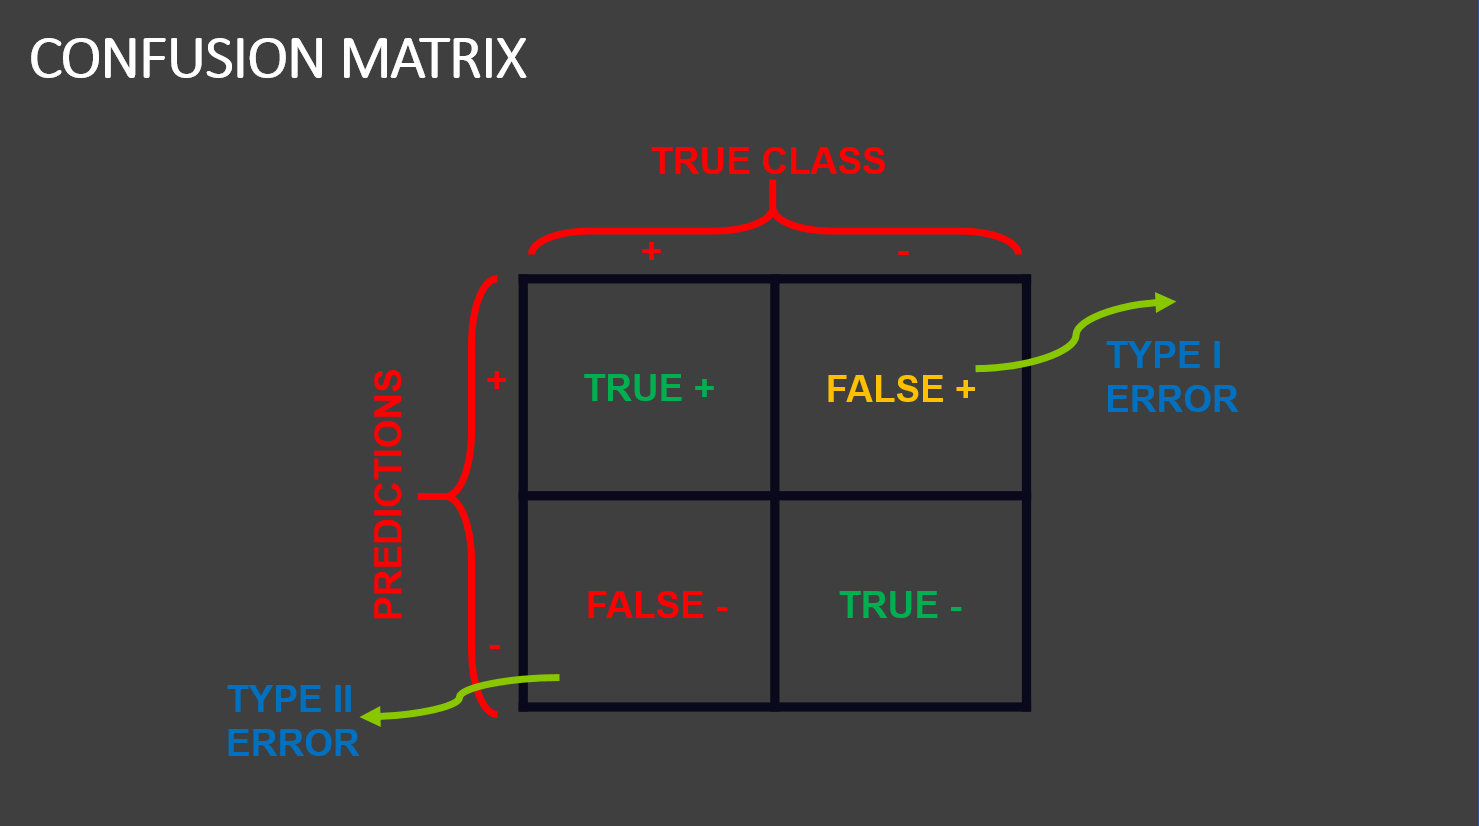

In [80]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


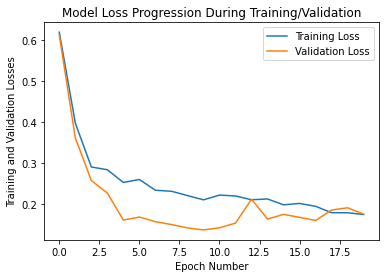

In [81]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [82]:
predicted = model.predict(X_test)

In [83]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [84]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        60
           1       0.91      0.87      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



- **Accuracy**: The number of correct predictions made by the model divided by the total number of predictions. It is useful when target classes are balanced.


- **Recall**: Ability of a model to find all the relevant cases in a dataset. (# true positives / (#true positives + # false negatives))


- **Precision**: Ability of a model to identify only the relevant data points. (# true positives / (#true positives + # false positives))


- **f1-score**: In cases where we want to find an optimal blend of precision and recall we can combine the two metrics using what is called an f1 score. The f1-score is the harmonic mean of precision and recall taking both metrics into account in the following equation: 2 * ((precision * recall)/ (precision + recall))

*We use Harmonic Mean instead of a simple average since it punishes extreme values.*

<AxesSubplot:>

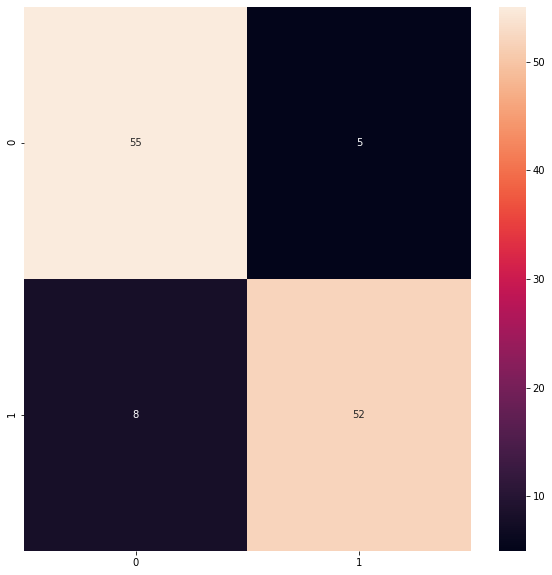

In [85]:
plt.figure(figsize=(10, 10))

cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot = True)